# Import Library:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Setup Completed!')

Setup Completed!


# Import Data:

In [21]:
df = pd.read_csv('Shoe prices.csv')
df

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00
...,...,...,...,...,...,...,...,...
1001,New Balance,Fresh Foam 880v11,Running,Women,US 10,Grey,Mesh,$130.00
1002,Asics,Gel-Kayano Lite,Running,Men,US 9.5,Black,Mesh,$160.00
1003,Fila,Venom 94,Fashion,Women,US 7.5,White,Leather,$70.00
1004,Skechers,Summits,Training,Men,US 8,Grey,Mesh,$55.00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB


In [23]:
df.duplicated().any()

True

In [24]:
df[df.duplicated()]

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
84,Converse,Jack Purcell,Casual,Men,US 9,White,Canvas,$65.00
142,Nike,Air Force 1,Casual,Men,US 11,White,Leather,$90.00
222,Nike,Air Force 1,Casual,Men,US 11,White,Leather,$90.00
243,Nike,Air Force 1 '07,Basketball,Men,US 11,White,Leather,$90.00
263,Nike,Air Force 1,Basketball,Men,US 11,White,Leather,$90.00
...,...,...,...,...,...,...,...,...
957,Reebok,Classic Nylon,Casual,Men,US 10,Grey,Nylon,$65.00
985,Nike,Air Force 1,Casual,Men,US 9,White,Leather,$90.00
986,Adidas,NMD_R1,Lifestyle,Women,US 8,Black,Primeknit,$140.00
988,Converse,Jack Purcell,Casual,Men,US 8.5,White,Canvas,$70.00


In [25]:
df.isnull().sum()

Brand          0
Model          0
Type           0
Gender         0
Size           0
Color          0
Material       0
Price (USD)    0
dtype: int64

# Data Cleaning:

In [26]:
df = df.drop_duplicates()

In [27]:
df['Price (USD)'] = df['Price (USD)'].str.replace('$','', regex = True)
df['Price (USD)'] = df['Price (USD)'].astype('float')

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_25101/424875407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price (USD)'] = df['Price (USD)'].str.replace('$','', regex = True)
/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_25101/424875407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price (USD)'] = df['Price (USD)'].astype('float')


In [29]:
df

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,170.0
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,180.0
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,75.0
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,55.0
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,80.0
...,...,...,...,...,...,...,...,...
1001,New Balance,Fresh Foam 880v11,Running,Women,US 10,Grey,Mesh,130.0
1002,Asics,Gel-Kayano Lite,Running,Men,US 9.5,Black,Mesh,160.0
1003,Fila,Venom 94,Fashion,Women,US 7.5,White,Leather,70.0
1004,Skechers,Summits,Training,Men,US 8,Grey,Mesh,55.0


# Data Reporting:

## About Brand Model:

In [36]:
brand_model = df.groupby('Brand')['Model'].count().sort_values(ascending = False)
brand_model

Brand
New Balance    98
Fila           97
Asics          95
Nike           95
Adidas         94
Puma           94
Reebok         94
Skechers       87
Vans           87
Converse       84
Name: Model, dtype: int64

In [37]:
df_brand_model = brand_model.to_frame('Model Number').rename_axis('Brand').reset_index()
df_brand_model

,Brand,Model Number
0,New Balance,98
1,Fila,97
2,Asics,95
3,Nike,95
4,Adidas,94
5,Puma,94
6,Reebok,94
7,Skechers,87
8,Vans,87
9,Converse,84


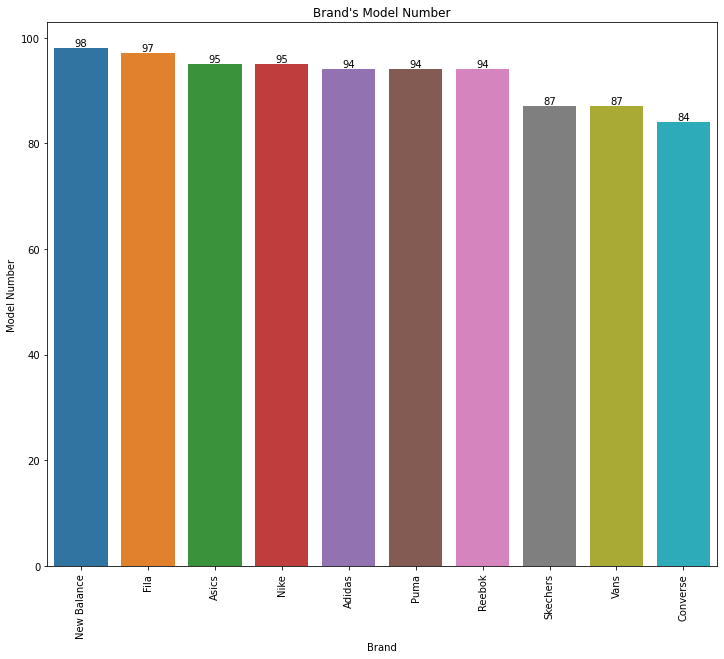

In [40]:
plt.figure(figsize =(12,10))
ax = sns.barplot(x = df_brand_model['Brand'], y = df_brand_model['Model Number'], order = brand_model.index)
plt.xticks(rotation = 90)
plt.title("Brand's Model Number")
ax.bar_label(ax.containers[0])
plt.show();

## About Brand Price:

In [43]:
brand_price = df.groupby('Brand')['Price (USD)'].mean().sort_values(ascending = False)
brand_price

Brand
Adidas         147.287234
Asics          130.315789
Nike           129.789474
New Balance    117.703980
Reebok         110.531915
Puma            99.787234
Converse        79.047619
Skechers        71.195287
Fila            69.845361
Vans            59.827586
Name: Price (USD), dtype: float64

In [44]:
df_brand_price = brand_price.to_frame('Price AVG').rename_axis('Brand').reset_index()
df_brand_price

,Brand,Price AVG
0,Adidas,147.287234
1,Asics,130.315789
2,Nike,129.789474
3,New Balance,117.703980
4,Reebok,110.531915
5,Puma,99.787234
6,Converse,79.047619
7,Skechers,71.195287
8,Fila,69.845361
9,Vans,59.827586


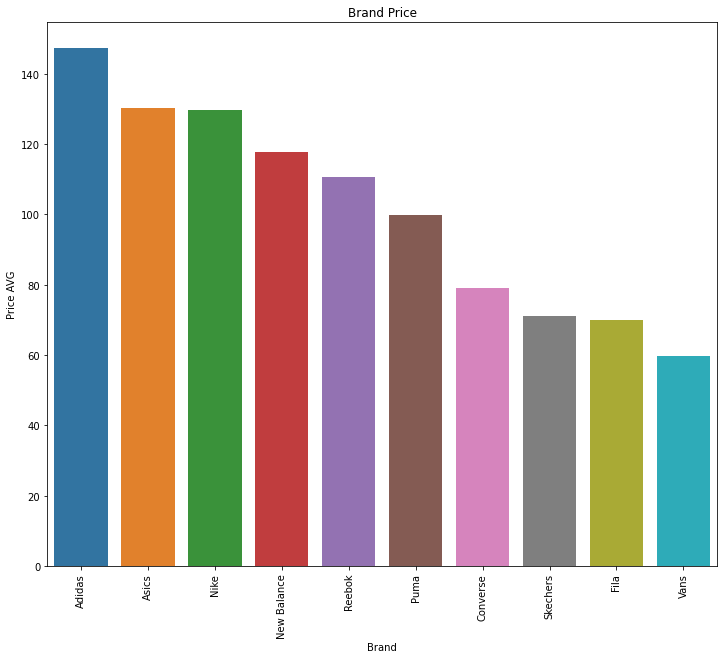

In [49]:
plt.figure(figsize = (12,10))
ax = sns.barplot(x = df_brand_price['Brand'], y = df_brand_price['Price AVG'])
plt.xticks(rotation = 90)
plt.title('Brand Price')
plt.show();

## About Price Via Material:

In [47]:
material_price = df.groupby('Material')['Price (USD)'].mean().sort_values(ascending = False)
material_price

Material
Primeknit/Synthetic     220.000000
Mesh/Leather            180.000000
Primeknit               168.730159
Flyknit                 158.823529
Mesh/Synthetic          133.333333
Textile                 130.000000
Textile/Leather         130.000000
Flexweave/Synthetic     130.000000
Flexweave/Knit          130.000000
Flexweave               130.000000
Flexweave/Cushioning    130.000000
Knit/Synthetic          123.333333
Leather/Mesh            120.000000
Synthetic/Mesh          115.000000
Mesh                    112.665507
Knit                    112.333333
Mesh/Suede              110.000000
Synthetic/Textile       105.000000
Leather/Suede           105.000000
Suede/Mesh              103.749687
Suede/Nylon              92.500000
Leather                  88.678571
Leather/Synthetic        87.000000
Synthetic                86.444444
Synthetic/Leather        85.833333
Suede/Leather            85.000000
Suede/Textile            83.333333
Canvas/Leather           70.000000
Suede/Canva

In [48]:
df_material_price = material_price.to_frame('Price AVG').rename_axis('Material').reset_index()
df_material_price

,Material,Price AVG
0,Primeknit/Synthetic,220.000000
1,Mesh/Leather,180.000000
2,Primeknit,168.730159
3,Flyknit,158.823529
4,Mesh/Synthetic,133.333333
5,Textile,130.000000
6,Textile/Leather,130.000000
7,Flexweave/Synthetic,130.000000
8,Flexweave/Knit,130.000000
9,Flexweave,130.000000


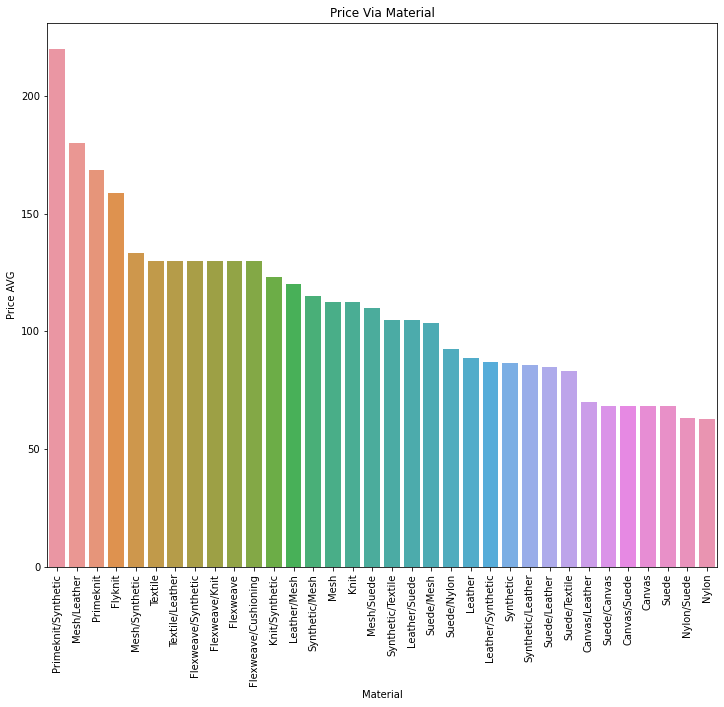

In [50]:
plt.figure(figsize = (12,10))
ax = sns.barplot(x = df_material_price['Material'], y = df_material_price['Price AVG'])
plt.xticks(rotation = 90)
plt.title('Price Via Material')
plt.show()

## About Price Via Model:

In [109]:
df_price_model = df[['Brand','Model','Price (USD)']].sort_values(by = 'Price (USD)')
df_price_model

,Brand,Model,Price (USD)
595,Adidas,Adilette Shower,25.0
51,Adidas,Adilette Cloudfoam,35.0
233,Adidas,Adilette Comfort,35.0
670,Vans,Slip-On,50.0
420,Vans,Slip-On,50.0
...,...,...,...
446,Adidas,Yeezy Boost 350 V2,220.0
527,Adidas,Yeezy Boost 350 V2,220.0
707,Adidas,Yeezy Boost 350 V2,220.0
465,Adidas,Yeezy Boost 350 V2,220.0


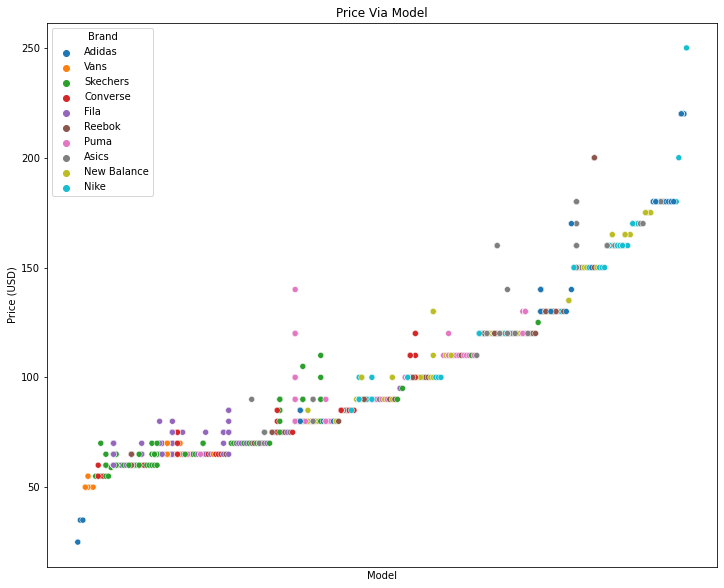

In [110]:
plt.figure(figsize = (12,10))
ax = sns.scatterplot(x = df_price_model ['Model'], y = df_price_model ['Price (USD)'], hue = df_price_model['Brand'])
plt.title('Price Via Model')
ax.set_xticks([])
plt.show();

## About Type, Gender and Price:

In [115]:
df_gender_type = df[['Gender','Type','Price (USD)']].sort_values(by = 'Price (USD)', ascending = False )
df_gender_type

,Gender,Type,Price (USD)
555,Men,Running,250.0
707,Women,Fashion,220.0
244,Men,Fashion,220.0
347,Women,Fashion,220.0
396,Women,Lifestyle,220.0
...,...,...,...
479,Men,Skate,50.0
902,Men,Skate,50.0
51,Women,Slides,35.0
233,Women,Slides,35.0


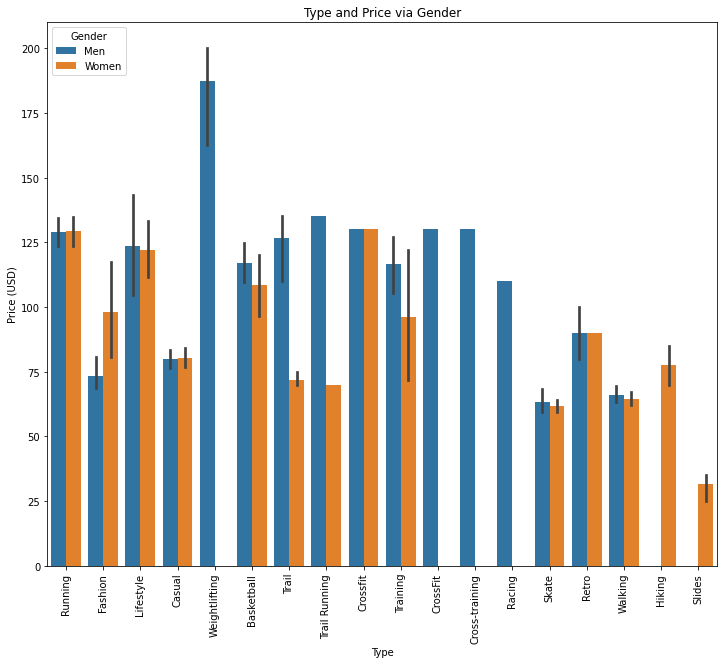

In [119]:
plt.figure(figsize = (12,10))
ax = sns.barplot(x = df_gender_type ['Type'], y = df_gender_type ['Price (USD)'], hue = df_gender_type['Gender'])
plt.title('Type and Price via Gender')
plt.xticks(rotation = 90)
plt.show();

# SIUUUUUUUUUUUUUUUUUUUUUUUUUUUU !!!